In [9]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
cust_df = pd.read_csv('cleanedData.csv')
cust_df[0:5]

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
X = cust_df[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']].values
X[0:5]

array([['Male', 19, 15, 39],
       ['Male', 21, 15, 81],
       ['Female', 20, 16, 6],
       ['Female', 23, 16, 77],
       ['Female', 31, 17, 40]], dtype=object)

In [4]:
from sklearn import preprocessing
le_gender = preprocessing.LabelEncoder()
le_gender.fit(['Male', 'Female'])
X[:,0] = le_gender.transform(X[:,0]) 
X[0:5]

array([[1, 19, 15, 39],
       [1, 21, 15, 81],
       [0, 20, 16, 6],
       [0, 23, 16, 77],
       [0, 31, 17, 40]], dtype=object)

In [5]:
from sklearn.preprocessing import StandardScaler
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

array([[ 1.12815215, -1.42456879, -1.73899919, -0.43480148],
       [ 1.12815215, -1.28103541, -1.73899919,  1.19570407],
       [-0.88640526, -1.3528021 , -1.70082976, -1.71591298],
       [-0.88640526, -1.13750203, -1.70082976,  1.04041783],
       [-0.88640526, -0.56336851, -1.66266033, -0.39597992],
       [-0.88640526, -1.20926872, -1.66266033,  1.00159627],
       [-0.88640526, -0.27630176, -1.62449091, -1.71591298],
       [-0.88640526, -1.13750203, -1.62449091,  1.70038436],
       [ 1.12815215,  1.80493225, -1.58632148, -1.83237767],
       [-0.88640526, -0.6351352 , -1.58632148,  0.84631002],
       [ 1.12815215,  2.02023231, -1.58632148, -1.4053405 ],
       [-0.88640526, -0.27630176, -1.58632148,  1.89449216],
       [-0.88640526,  1.37433211, -1.54815205, -1.36651894],
       [-0.88640526, -1.06573534, -1.54815205,  1.04041783],
       [ 1.12815215, -0.13276838, -1.54815205, -1.44416206],
       [ 1.12815215, -1.20926872, -1.54815205,  1.11806095],
       [-0.88640526, -0.

In [6]:
clusterNum = 3
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(Clus_dataSet)
labels = k_means.labels_
print(labels)

[0 0 2 0 2 0 2 0 1 0 1 0 2 0 1 0 2 0 1 0 1 0 2 0 2 0 2 0 2 0 1 0 1 0 2 0 2
 0 2 0 2 0 1 0 2 0 2 2 2 2 2 0 2 1 2 1 2 1 0 1 1 0 2 2 1 0 2 2 0 2 1 2 2 2
 1 0 2 1 0 2 1 1 1 2 0 1 2 0 0 2 2 0 1 2 2 0 2 0 1 0 0 2 1 0 1 0 2 1 1 1 1
 0 2 0 0 0 2 2 2 2 0 2 2 0 2 0 1 0 1 0 1 0 2 0 1 0 2 0 1 0 2 0 2 0 1 0 1 0
 2 0 1 0 2 0 2 0 1 0 1 0 2 0 1 0 1 0 1 0 2 0 1 0 1 0 2 0 1 0 1 0 2 0 1 0 2
 0 2 0 2 0 2 0 1 0 2 0 2 0 1 0]


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17332\3286291976.py:4: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17332\3286291976.py:8: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  ax.scatter(X[:, 1], X[:, 0], X[:, 3], c= labels.astype(np.float))


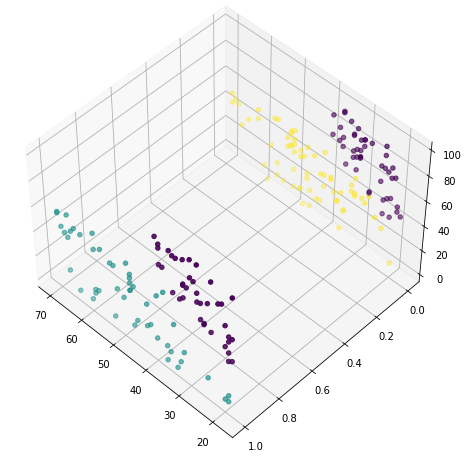

In [10]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()

ax.scatter(X[:, 1], X[:, 0], X[:, 3], c= labels.astype(np.float))